<a href="https://colab.research.google.com/github/cbsebastian24/Trex/blob/main/Copy_of_module_project_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module Project 3

> Back Bay National Wildlife Refuge is located in the southeastern corner of the City of Virginia Beach. The refuge was established in 1938 to protect and provide habitat for migrating and wintering waterfowl. Diverse habitats, including beachfront, freshwater marsh, dunes, shrub-scrub and upland forest are home to hundreds of species of birds, reptiles, amphibians, mammals and fish.

![BNWR](https://www.fws.gov/sites/default/files/styles/banner_image_xl/public/banner_images/2020-09/waterfowl%20%28tundras%29.jpg?h=0c8d0f81&itok=NcZlpD27)


To get introduced to the park and its history, please view the following interactive story map.

[BBNWR History and Introduction](https://storymaps.arcgis.com/stories/960d9db38cca4f3d8d38111119b9874f)

Additionally, here is some drone footage of the park for a better look at the geography and ecology of the area.

[BBNWR Drone Footage](https://www.youtube.com/watch?v=NlW330aBTCc)

In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sb
import statsmodels.api as sm
import scipy.stats as sps
import statsmodels.stats.proportion as prop

In [2]:
bbnwr = pd.read_csv("https://raw.githubusercontent.com/UM-Data-Science-101/homework-09/refs/heads/main/BKB_WaterQualityData_2020084.csv")
bbnwr.columns

Index(['Site_Id', 'Unit_Id', 'Read_Date', 'Salinity (ppt)',
       'Dissolved Oxygen (mg/L)', 'pH (standard units)', 'Secchi Depth (m)',
       'Water Depth (m)', 'Water Temp (?C)', 'Air Temp-Celsius',
       'Air Temp (?F)', 'Time (24:00)', 'Field_Tech', 'DateVerified',
       'WhoVerified', 'AirTemp (C)', 'Year'],
      dtype='object')

In [3]:
bbnwr["Site_Id"] = bbnwr["Site_Id"].replace({'d': 'D'})

## Question 1

### Q1a

The water in BBNWR is a mix of fresh water and sea water. Sea water has an average salinity of 35 ppt (parts per thousand). Because fresh water flows into the Bay, however, the level of salinity can be much lower, depending how much fresh water enters the system. Such systems are described through a tiered system of descriptions based on the amount of salt in the water.

A oligohaline mixture is one in which the saline content is between 0.5 - 5.0. More details on [classifying estuaries can be found in this EPA report](https://www.epa.gov/sites/default/files/2015-09/documents/2009_03_13_estuaries_monitor_chap14.pdf).

Let's test the theory that the measurements from the Bay come from a oligohaline mixture or a mixture with more saline content, so that salinity is more than 0.5.

For this hypothesis test will we use a $\alpha$-level (maximum Type I error probability) of $0.0015$.

Clearly state:

- The null hypothesis
- The alternative hypothesis
- A suitable test statistic
- The standard error of this test statistic
- A rejection region that will have probability of including the test statistic 0.0015 when the null hypothesis is true.

Null hypothesis: The true mean salinity in the bay is less than or equal to 0.5. Alternative hypothesis: The true mean salininity in the bay is greater than 0.5. Test statistic is T = (X - 0.5)/(S/squareroot(n)) where X is the sample mean salinity and S is standard deviation. The standard error test statistic would be S/(squareroot(n)). The rejection region would be the 0.15% of the area to the right of the t-distribution, which depends on the sameple size where degrees of freedom is n-1.



### Q1b

Now that we have described our hypothesis test, compute all quantities needed to compute the test statistic, standard error, and rejection region. You may find it helpful to create a table that only includes observations from the Bay with non-missing values for "Salinity (ppt)".

In [21]:
# compute quantities
bay = bbnwr[bbnwr["Site_Id"].str.contains("Bay", case = False, na = False)]
#case should ignore lowercase and na = false ignores missing entries
bay = bay[bay["Salinity (ppt)"].notna()]
#should pull all bay and salinity data

alpha = 0.0015
u = 0.5
xbar = bay["Salinity (ppt)"].mean()
#sample mean
s = bay["Salinity (ppt)"].std()
#standard deviation
n = len(bay)
#sample size
Se = s/np.sqrt(n)
#standard error
t = (xbar - u)/(Se)
#test statistic
tCrit = sps.t.ppf(1-alpha, df = n-1)
reject = t >= tCrit
#critical value
print("Mean is ")
print(xbar)
print("Standard deviation is ")
print(s)
print("Sample size is ")
print(n)
print("Standard error is ")
print(Se)
print("Test statistic is ")
print(t)
print("The critical value is ")
print(tCrit)
print(f"Rejection region: T >= {tCrit:.4f}")



Mean is 
1.4831536388140159
Standard deviation is 
1.5775927700212167
Sample size is 
742
Standard error is 
0.057915252566277
Test statistic is 
16.97572910847476
The critical value is 
2.9775877713215264
Rejection region: T >= 2.9776


### Q1c

Perform the hypothesis test. Clearly state whether you reject or fail to reject the null hypothesis. Interpret this result with result to the original question of whether the average salinity of the Bay is consistent with a oligohaline (or more extreme) mixture.


In [31]:
# perform test
if reject:
    print("Reject null hypothesis, the average salinity is greater than 0.5")
else:
    print("Fail to reject null hypothesis that the average salinity is less than or equal to 0.5")

print("The hypothesis test indicates that the average salinity of the Bay is significantly greater than 0.5 ppt. Thererfore the Bays water is atleast an olgohaline mixture.")

Fail to reject null hypothesis that the average salinity is less than or equal to 0.5
The hypothesis test indicates that the average salinity of the Bay is significantly greater than 0.5 ppt. Thererfore the Bays water is atleast an olgohaline mixture.


### Q1d

We could also approach this question by creating a confidence interval for the average salinity in the population of all measurements in the Bay.

Using the quantities above, create a 99.7% confidence interval of the average salinity of the Bay. What does this interval tell us about the following table of salinity mixture tiers:

| Level | Salinity |
| ----- | -------- |
| Fresh Water | < 0.5 ppt |
| Oligohaline | 0.5 -- 5.0 ppt|
| Mesohaline | 5.0-18.0 ppt|
| Polyhaline | 18.0­ -- 30 ppt |
| Ocean | > 30 ppt |


In [24]:
# confidence interval
u = 0.5
alpha = 1-0.997
xbar = bay["Salinity (ppt)"].mean()
s = bay["Salinity (ppt)"].std()
n = len(bay)
Se = s/np.sqrt(n)

t = sps.t.ppf(1-alpha/2, df = n-1)
lower = xbar - t*Se
upper = xbar + t*Se

print(f"The 99.7% confidence interval is ({lower:.4f}, {upper:.4f})")
print(f"This tells us that the confidence interval is consistent with the olgohaline mixture.")

The 99.7% confidence interval is (1.3107, 1.6556)
This tells us that the confidence interval is consistent with the olgohaline mixture.


Which of these levels can be ruled out for the Bay?

Fresh water, Mesohaline, Polyhaline, and ocean levels can be ruled out for the Bay because 99.7% confidence interval lies aboves the 0.5 ppt and below the 5.0 ppt. Therefore, the average salinity of Bay is likely an olgohaline mixture.

## Question 2

### Q2a

A [Secchi disk](https://en.wikipedia.org/wiki/Secchi_disk) is a device used to measure the clarity of water by submerging the disk and measuring the depth at which it is no longer visible.

![Secchi Disk](https://upload.wikimedia.org/wikipedia/commons/thumb/0/0b/Secchi_disk_pattern.svg/240px-Secchi_disk_pattern.svg.png)

A common definition of "clear water" is being able to view a Secchi disk at 4m. In the case of the BBNWR, most of the depths are less than 4m:


<Axes: xlabel='Water Depth (m)', ylabel='Count'>

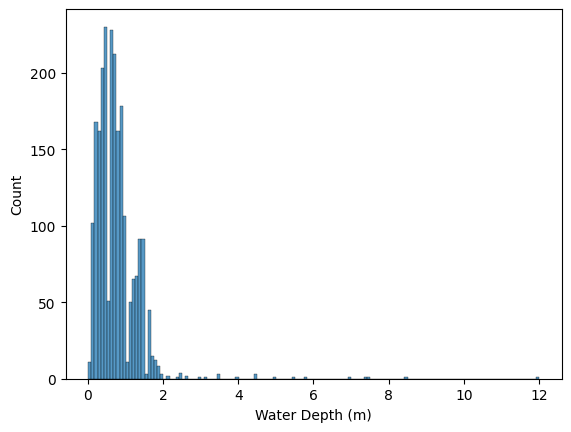

In [13]:
sb.histplot(data = bbnwr, x = "Water Depth (m)")

Create a new column "clear" that is `True` if either of the following conditions is met:

- The "Secchi Depth (m)" is at least 4m
- The "Secchi Depth (m)" is at least as large as the "Water Depth (m)" (due to small differences due to waves/location/etc
 Secchi Depth can be (slightly) greater than Water Depth)

 Display the proportion of "clear" observations.


In [28]:
# proprotion of clear observations
bbnwr["clear"] = (bbnwr["Secchi Depth (m)"] >= 4) | (bbnwr["Secchi Depth (m)"] >= bbnwr["Water Depth (m)"])

propClear = bbnwr["clear"].mean()
print(f"The proportion of clear observations is {propClear:.4f}")


The proportion of clear observations is 0.3889


### Q2b

Test the hypothesis  that the population proportion of clear measurements is 37% against the alternative that it is not equal to 37%.

Use $\alpha = 0.05$. Clearly state if you reject or fail to reject this hypothesis.

In [36]:
# test
alpha = 0.05
p = bbnwr["clear"].mean()
n = len(bbnwr)
p0 = 0.37
Se = np.sqrt(p0*(1-p0)/n)
z = (p-p0)/Se
pVal = 2*(1-sps.norm.cdf(abs(z)))
reject = pVal < alpha
print(f"The test statistic is {z:.4f}")
print(f"The p-value is {pVal:.4f}")
print(f"Rejection region: Z < -1.96 or Z > 1.96")
if reject:
    print("Reject null hypothesis that the population proportion is equal to 37%")
else:
    print("Fail to reject null hypothesis that the population proportion is equal to 37%")


The test statistic is 1.9027
The p-value is 0.0571
Rejection region: Z < -1.96 or Z > 1.96
Fail to reject null hypothesis that the population proportion is equal to 37%


Fail to reject null hypothesis that the population proportion is equal to 37%

### Q2c

Referring the result from the previous section, compute the $p$-value for this hypothesis.

In [34]:
# you will find sps.norm.cdf helpful
pVal = 2*(1-sps.norm.cdf(abs(z)))
print(f"The p-value is {pVal:.4f}")

The p-value is 0.0571


Consider three different people:

- Person A has a 10% tolerance for Type I errors
- Person B has a 5% tolerance for Type I errors
- Person C has a 1% tolerance for Type I errors


Which of these people (if any) would reject the null hypothesis that 37% of all possible measurements would be clear. Justify your answer.



Person A would reject the null hypothesis since the p value fo 0.0571 is less than 0.1. Person B and C would not reject the null hypothesis since the tolerance are less than the p value.

### Q2d

Using values you computed in the previous sections, create a 95% confidence interval for the proportion of clear observations in the population of all observations.

Note: you will need to use the estimated standard error of the sample proportion ($\hat p$) of: $\sqrt{\frac{\hat p(1-\hat p)}{n}}$.

Interpret this result in words.

In [48]:
# confidence interval
p = bbnwr["clear"].mean()
n = bbnwr["clear"].notna().sum()
#for counting only valid data
Se = np.sqrt(p*(1-p)/n)
Z = sps.norm.ppf(1-alpha/2)
lower = p - Z*Se
upper = p + Z*Se
print(f"The 95% confidence interval is ({lower:.4f}, {upper:.4f})")

The 95% confidence interval is (0.3692, 0.4085)


The 95% confidence interval for the proportion of clear observations is (0.3692, 0.4085). This means that we are 95% confident that between 36.9% and 40.9% of all possible measurements are clear which is consistent with our null hypothesis that 37% of the population proportion is clear.

## Question 3

Select another column from the list:

- `'pH (standard units)'`
- `'Water Temp (?C)'`
- `'AirTemp (C)'`

Wrtie the column name here: pH

### Q3a



In [33]:
bbnwr[["pH (standard units)", "Water Temp (?C)", "AirTemp (C)"]].aggregate(["min", "max"])

,pH (standard units),Water Temp (?C),AirTemp (C)
min,0.3,0.0,-17.777778
max,9.9,74.0,33.500000


Above are the minimum and maximum observed values for these variables. Assuming that the population ranges would be similar, **state a theory of the average value** for your selected variable. Where do you think it will be? (Do not graph or otherwise calculate anything about these columns -- you will not be judged on being correct later, so don't worry if you are wrong.)

*double click to edit*

Turn your theory into a hypothesis test. Be careful about selecting the appropriate hypothesis to represent your theory. Fill in the following:

- Population parameter: The true mean pH of the Bay
- Parameter space: 0-14 or pH scale
- $H_0$: average pH is 7.0 on average
- $H_1$: the average pH is not 7.0
- Test statistic:
- Null distribution:
- Alternative distribution:
- $\alpha$-level (your choice!):
- Rejection Region:
- This is a one tailed or a two tailed test?

### Q3b

Perform your hypothesis test. Comment on the results. What do the results mean about your theory?

In [ ]:
u = 7
xbar = bbnwr["pH (standard units)"].mean()
s = bbnwr["pH (standard units)"].std()
n = len(bbnwr)
Se = s/np.sqrt(n)
t = (xbar - u)/(Se)
tCrit = sps.t.ppf(1-alpha, df = n-1)
reject = t >= tCrit

*Comments*

### Q3c

Regardless of whether you used a one or two tailed test in the previous, create a confidence interval for the population parameter using the same $\alpha$-level. Interpret the values in the interval. What do they mean? Given what you see in this interval, would you update your theory about the population mean value?


In [ ]:
# calculation


*Interpretation*

### Q3d

While the mean of the population will be "in the middle" of the distribution, it is not guaranteed to be the value such that 50% of the population has smaller values while 50% has larger values (this would be the median).

State a hypothesis about the population proportion that would be smaller than your updated guess about the population mean from the previous part.

In other words, if $X$ is a random variable representing the population, $c$ is your best guess based on the previous section, what would you now about the value $p$ in the expression:

$$P(X \le c) = p$$

*your theory*

Turn your theory into a hypothesis test. Be careful about selecting the appropriate hypothesis to represent your theory. Fill in the following:

- Population parameter (replace $c$): $P(X \le c) = p$
- Parameter space:
- $H_0$:
- $H_1$:
- Test statistic:
- Null distribution:
- Alternative distribution:
- $\alpha$-level (your choice!):
- Rejection Region:
- This is a one tailed or a two tailed test?

### Q3e

Perform the test and interpret the results.

### Q3d

Create a confidence interval for $p$ using the $\alpha$ you selected in (d). Interpret the results.

In [ ]:
# calculations

Interpretation